In [57]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [58]:
from pycaret.utils import version
version()

'3.2.0'

In [59]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [60]:
cancer_dataset = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [61]:
cancer_dataset.to_csv("cancer_dataset.csv")
from google.colab import files

In [62]:
files.download('cancer_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**kMeans Clustering**

In [63]:
from pycaret.clustering import *
kMeanClusteringParameters = setup(cancer_dataset)

,Description,Value
0,Session id,5594
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [64]:
KMeanClusteringModel = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5345,518.5344,1.5593,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [65]:
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0,5,1,1,1,2,1,3,1,1,Cluster 0
1,0,5,4,4,5,7,10,3,2,1,Cluster 2
2,0,3,1,1,1,2,2,3,1,1,Cluster 0
3,0,6,8,8,1,3,4,3,7,1,Cluster 1
4,0,4,1,1,3,2,1,3,1,1,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1,Cluster 0
679,0,2,1,1,1,2,1,1,1,1,Cluster 0
680,1,5,10,10,3,7,3,8,10,2,Cluster 1
681,1,4,8,6,4,3,4,10,6,1,Cluster 1


In [66]:
kMeanPrediction.to_csv("KMeanResult.csv")
print("Result file save sucessfully!!")

Result file save sucessfully!!


In [67]:
from google.colab import files
files.download('KMeanResult.csv')      # Uncomment this line
# Open and Explore result file (KMeanResult.csv).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [69]:
from google.colab import files
# files.download('kMeanClusteringModelFile.pkl')

**CLUSTERING**

In [70]:
newData = get_data("cancer").iloc[:10]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [71]:
newPredictions = predict_model(KMeanClusteringModel, data = newData)
newPredictions

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
1,0.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,Cluster 2
2,0.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,Cluster 0
3,0.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,Cluster 1
4,0.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
5,1.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,Cluster 3
6,0.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,Cluster 0
7,0.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
8,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,Cluster 0
9,0.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,Cluster 0


**Evaluating Cluster Model**

In [72]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
# 2D plot
plot_model(KMeanClusteringModel, plot='cluster')

In [74]:
#3D plot
plot_model(KMeanClusteringModel, plot = 'tsne')

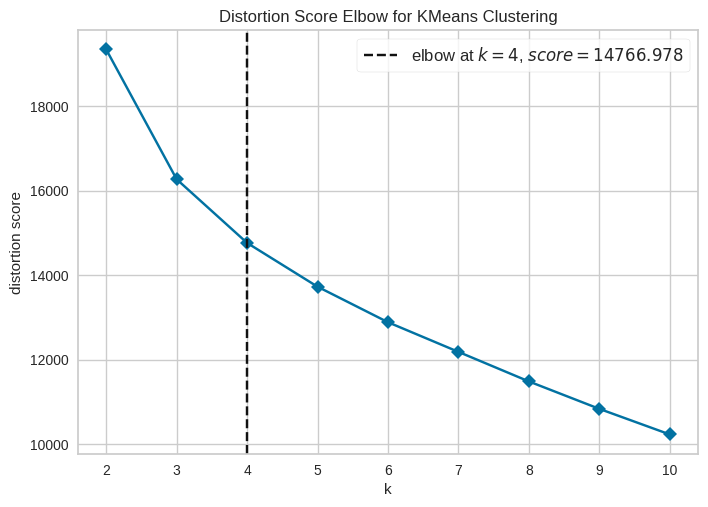

In [75]:
#Elbow Plot
plot_model(KMeanClusteringModel, plot = 'elbow')

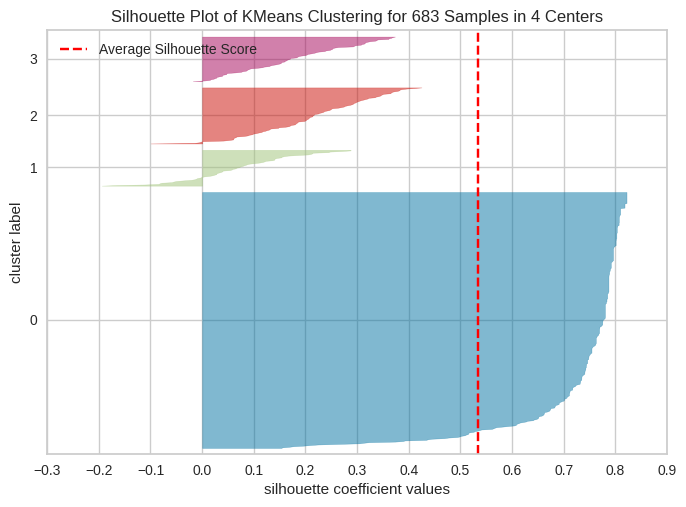

In [76]:
#Silhouette Plot
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [77]:
# Distribution Plot
plot_model(KMeanClusteringModel, plot = 'distribution')

# **Clustering (KMean)**

In [78]:

# For Cluster = 3, 4, 5, 6
from pycaret.datasets import get_data
from pycaret.clustering import *

cancer_dataset = get_data('cancer', verbose=False)
setup(data = cancer_dataset, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5261,675.2850,1.5406,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5366,518.8753,1.5616,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2607,430.4860,1.6568,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2567,375.2661,1.6766,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [79]:
import pandas as pd

# Create an empty list to store model summaries
model_summaries = []

# Iterate through different cluster numbers
for num_clusters in [3, 4, 5, 6]:
    print(f"For Cluster = {num_clusters}")

    # Create the KMeans model
    model = create_model('kmeans', num_clusters=num_clusters)

    # Get the model summary as a DataFrame
    model_summary = pull()

    # Create a new DataFrame with Cluster Number as the first column
    model_summary.insert(0, "Cluster Number", num_clusters)

    # Append the model summary to the list
    model_summaries.append(model_summary)

# Concatenate all model summaries into a single table
combined_table = pd.concat(model_summaries)

# Display the combined table
print(combined_table)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5261,675.2850,1.5406,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5366,518.8753,1.5616,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2607,430.4860,1.6568,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2567,375.2661,1.6766,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   Cluster Number  Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  \
0               3      0.5261           675.2850          1.5406            0   
0               4      0.5366           518.8753          1.5616            0   
0               5      0.2607           430.4860          1.6568            0   
0               6      0.2567           375.2661          1.6766            0   

   Rand Index  Completeness  
0           0             0  
0           0             0  
0           0             0  
0           0             0  


# ***Clustering: "Data Preprocessing"***

In [80]:
from pycaret.clustering import *
from pycaret.datasets import get_data

cancer_dataset = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


**Model Performance using "Normalization"**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5251,545.9161,1.5140,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

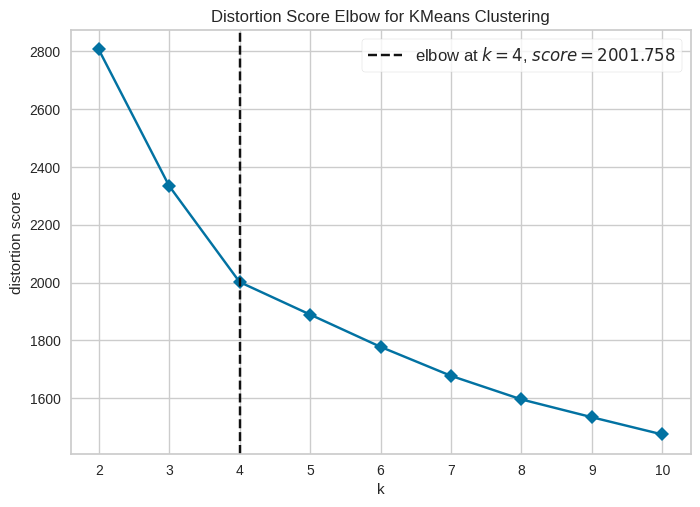

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5756,663.3644,1.1247,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5264,545.9763,1.5107,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5050,443.0257,1.6984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2431,384.7236,1.7416,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [81]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



In [82]:
#3D Plot for Cluster = 5
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5164,443.3426,1.6657,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation"



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4801,1207.6655,0.7984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

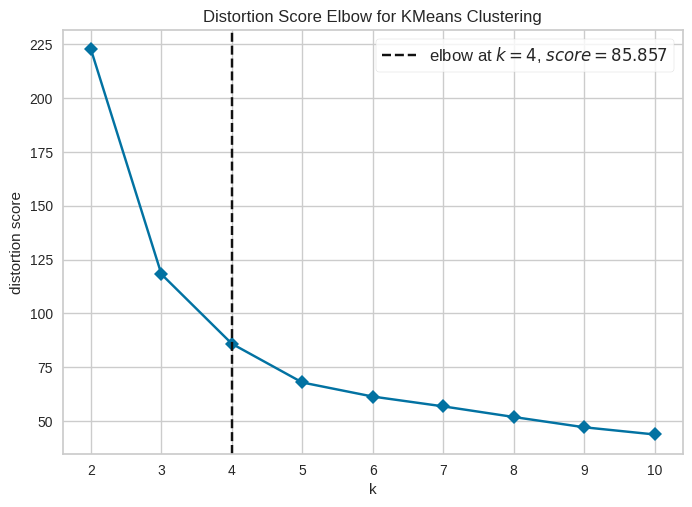

In [83]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [84]:
# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4833,1224.8647,0.7399,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4801,1207.6655,0.7984,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4461,1189.4876,0.8498,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,1037.7325,0.8411,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5362,519.1590,1.5585,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

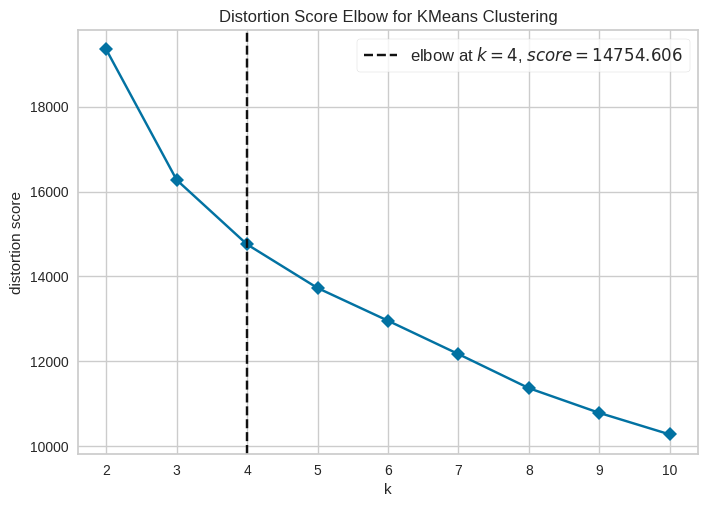

In [85]:
#Elbow Plot
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [86]:
#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)



For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5250,675.3120,1.5384,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5362,519.0235,1.5647,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2606,430.4617,1.6560,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2553,372.2876,1.6213,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

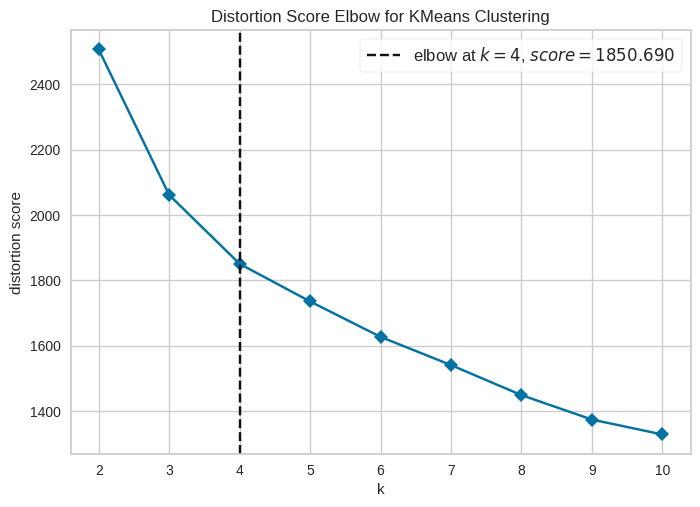

In [87]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [88]:
setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4984,786.5620,1.0845,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2525,497.4851,1.5544,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2437,431.7336,1.6440,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Model Performance using "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

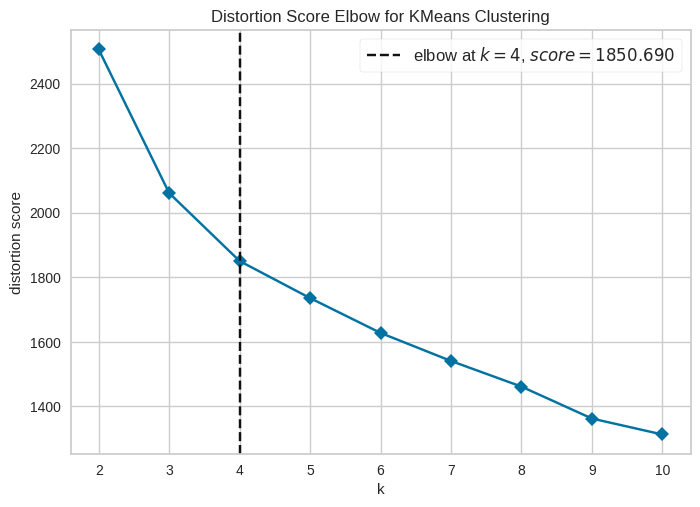

In [89]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [90]:
setup(data = cancer_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4984,786.5620,1.0845,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2466,608.9531,1.5917,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2324,493.5709,1.7888,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2474,432.2702,1.5982,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Other Clustering Techniques

**Hierarchical**

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4457,458.4135,1.7596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

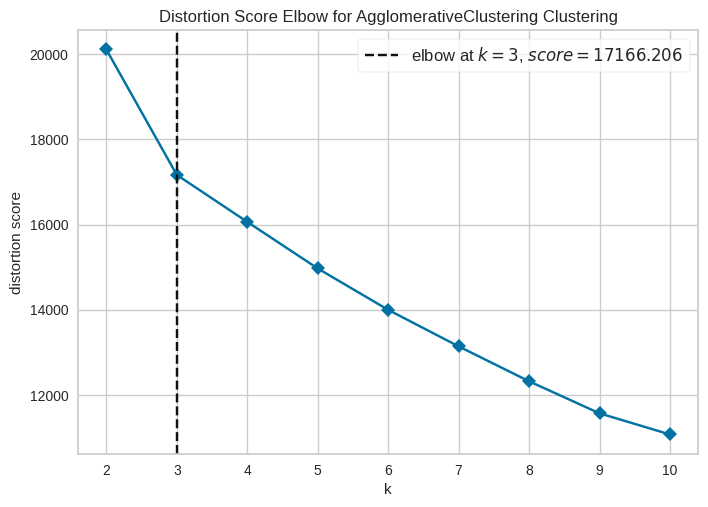

In [91]:
from pycaret.datasets import get_data
from pycaret.clustering import *

cancerrDataSet = get_data('cancer', verbose=False)
setup(data = cancer_dataset, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [92]:
hierarchicalModel = create_model('hclust', num_clusters=4)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4457,458.4135,1.7596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0,5,1,1,1,2,1,3,1,1,Cluster 1
1,0,5,4,4,5,7,10,3,2,1,Cluster 2
2,0,3,1,1,1,2,2,3,1,1,Cluster 1
3,0,6,8,8,1,3,4,3,7,1,Cluster 0
4,0,4,1,1,3,2,1,3,1,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1,Cluster 1
679,0,2,1,1,1,2,1,1,1,1,Cluster 1
680,1,5,10,10,3,7,3,8,10,2,Cluster 0
681,1,4,8,6,4,3,4,10,6,1,Cluster 0


In [93]:
evaluate_model(hierarchicalModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
from pycaret.datasets import get_data
from pycaret.clustering import *

cancerrDataSet = get_data('cancer', verbose=False)
setup(data = cancer_dataset, verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5097,622.5579,1.6886,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4457,458.4135,1.7596,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4465,380.7363,1.9950,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4514,334.6542,1.8149,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5110,506.9230,1.6495,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

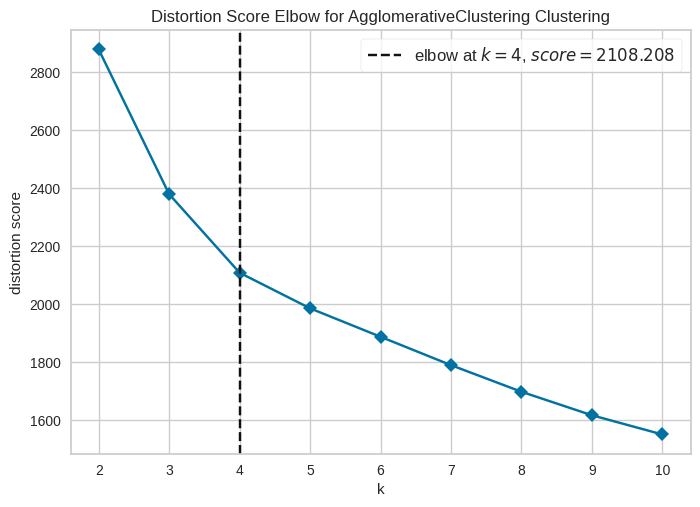

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5675,635.9428,1.1749,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5110,506.9230,1.6495,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5011,413.5872,1.8033,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4866,354.6248,1.7981,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [95]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4473,999.3069,0.8429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

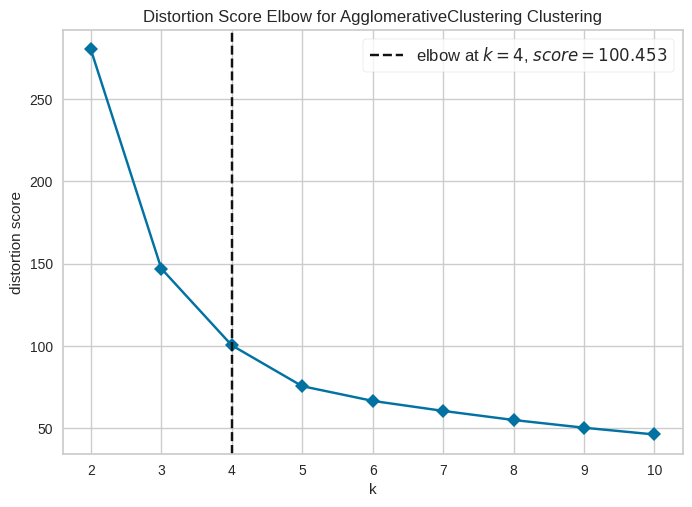

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4240,917.3254,0.6814,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4473,999.3069,0.8429,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4267,1049.6351,0.8797,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4075,969.1729,0.9127,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [96]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)



# PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4317,459.4082,1.7673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

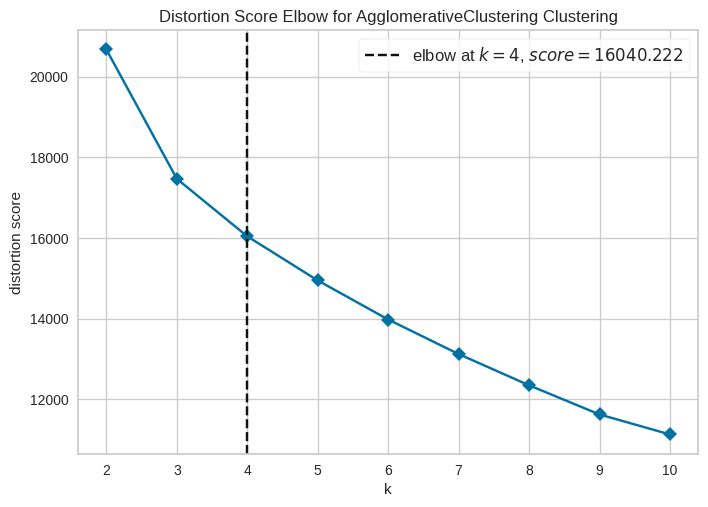

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5004,606.0001,1.6703,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4317,459.4082,1.7673,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4326,381.6608,1.9859,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4371,335.3809,1.8139,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [97]:
#Elbow Plot
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)


# Transformation" + "Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

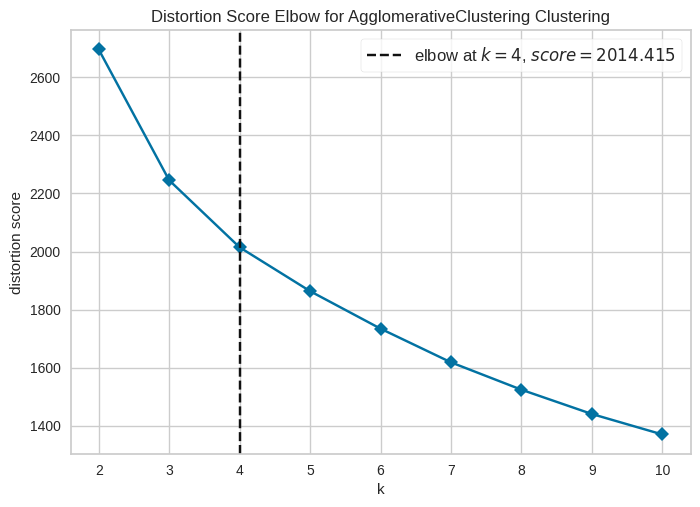

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4542,694.2909,1.1760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3746,451.7287,1.3675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2232,397.7946,1.7148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [98]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)




# "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

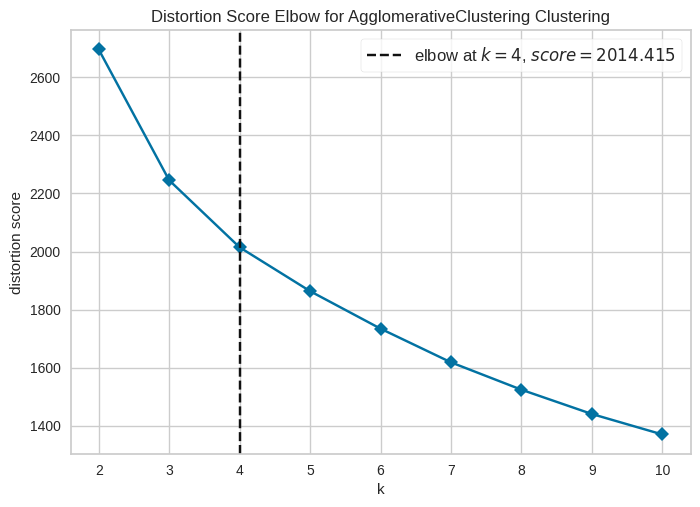

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4542,694.2909,1.1760,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4214,541.0642,1.4893,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3746,451.7287,1.3675,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2232,397.7946,1.7148,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [99]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = cancer_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
y = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
z = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
w = create_model('hclust', num_clusters = 6)



# Mean shift clustering              'meanshift'

In [119]:
from pycaret.datasets import get_data
from pycaret.clustering import *

cancerrDataSet = get_data('cancer', verbose=False)
setup(data = cancer_dataset, verbose=False)

x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [118]:
print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [115]:
#Model Performance using "Normalization"
#Elbow Plot
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4260,104.4535,1.2331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4260,104.4535,1.2331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4260,104.4535,1.2331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4260,104.4535,1.2331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4260,104.4535,1.2331,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [114]:
# Model Performance using "Transformation"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

# Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4633,948.9463,0.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4633,948.9463,0.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4633,948.9463,0.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4633,948.9463,0.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4633,948.9463,0.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [113]:
#PCA
#Elbow Plot
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)
x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

#Evaluation parameters for Cluster = 3, 4, 5, 6
setup(data = cancer_dataset, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [112]:
#Model Performance using "Transformation" + "Normalization"
#Elbow Plot
setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')


setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
x = create_model('meanshift', num_clusters = 6)




,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [111]:
# Model Performance using "Transformation" + "Normalization" + "PCA"
#Elbow Plot

setup(data = cancer_dataset, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

x = create_model('meanshift')
# plot_model(x, plot = 'elbow')

setup(data = cancer_dataset, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
y = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
z = create_model('meanshift', num_clusters = 5)

print("For Cluster = 6")
w = create_model('meanshift', num_clusters = 6)



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4515,596.4111,1.3587,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]